<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Credit_card_Defaulters./blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


In [1]:
#Mount Google drive to fetch Dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#importing necessary libraries
import numpy as np
import pandas as pd
#libraries for ploting graphs
import matplotlib.pyplot as plt
import seaborn as sns



## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [3]:
#store dataset as df
df = pd.read_csv("/content/drive/MyDrive/Alma better Projects/Supervised Classification - Credit card/Copy of default of credit card clients.csv",header = 1, index_col ='ID')

#Lets Understand the DataSet

In [4]:
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.rename(columns={'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR',
            'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR',
              'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR',
                'default payment next month':'IS_Defaulter'},inplace=True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      30000 non-null  int64
 1   SEX            30000 non-null  int64
 2   EDUCATION      30000 non-null  int64
 3   MARRIAGE       30000 non-null  int64
 4   AGE            30000 non-null  int64
 5   PAY_SEP        30000 non-null  int64
 6   PAY_AUG        30000 non-null  int64
 7   PAY_JUL        30000 non-null  int64
 8   PAY_JUN        30000 non-null  int64
 9   PAY_MAY        30000 non-null  int64
 10  PAY_APR        30000 non-null  int64
 11  BILL_AMT_SEPT  30000 non-null  int64
 12  BILL_AMT_AUG   30000 non-null  int64
 13  BILL_AMT_JUL   30000 non-null  int64
 14  BILL_AMT_JUN   30000 non-null  int64
 15  BILL_AMT_MAY   30000 non-null  int64
 16  BILL_AMT_APR   30000 non-null  int64
 17  PAY_AMT_SEPT   30000 non-null  int64
 18  PAY_AMT_AUG    30000 non-null  int64
 19  PAY_

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay_nxt_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.iloc[1]

LIMIT_BAL       120000
SEX                  2
EDUCATION            2
MARRIAGE             2
AGE                 26
PAY_SEP             -1
PAY_AUG              2
PAY_JUL              0
PAY_JUN              0
PAY_MAY              0
PAY_APR              2
BILL_AMT1         2682
BILL_AMT2         1725
BILL_AMT3         2682
BILL_AMT4         3272
BILL_AMT5         3455
BILL_AMT6         3261
PAY_AMT1             0
PAY_AMT2          1000
PAY_AMT3          1000
PAY_AMT4          1000
PAY_AMT5             0
PAY_AMT6          2000
IS_Defaulter         1
Name: 2, dtype: int64

In [ ]:
for i in df:
  
 print(i,f"Has : {len(df[i].unique())} Unique_values : {df[i].unique()}")
 print("--------------------------------------------------------------------------------")
 


LIMIT_BAL Has : 81 Unique_values : [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
--------------------------------------------------------------------------------
SEX Has : 2 Unique_values : [2 1]
--------------------------------------------------------------------------------
EDUCATION Has : 4 Unique_values : [2 1 3 4]
-------------------------------------------------------------------

#Quick Check for What can be condition for Defaulter
* As it will be cosiderable that a customer is not defaulter but taged as defaulter. 
* But client who is defaulter should not be escape.

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**If a client pay the Bills with due dates can still they be a Defaulter

In [9]:

display(df[(df["PAY_SEP"]|df["PAY_AUG"]|df["PAY_JUL"]|df["PAY_JUN"]|df["PAY_MAY"]|df["PAY_APR"]==0)])
# df.set_option('display.max_rows', None)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
15,250000,1,1,2,29,0,0,0,0,0,...,59696,56875,55512,3000,3000,3000,3000,3000,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,130000,1,1,2,34,0,0,0,0,0,...,108047,93708,97353,3000,2000,93000,4000,5027,4005,0
29989,250000,1,1,1,34,0,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0
29991,140000,1,2,1,41,0,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0


In [10]:
df[(df["PAY_SEP"]&df["PAY_AUG"]&df["PAY_JUL"]&df["PAY_JUN"]&df["PAY_MAY"]==-2) &(df["IS_Defaulter"]==1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
24,450000,2,1,1,40,-2,-2,-2,-2,-2,...,560,0,0,19428,1473,560,0,0,1128,1
46,210000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
139,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
275,360000,2,2,2,28,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
656,280000,1,2,1,39,-2,-2,-2,-2,-2,...,5400,3866,3526,3597,5672,5427,3885,3543,3519,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29377,290000,1,1,2,28,-2,-2,-2,-2,-2,...,6116,10462,1052,0,2765,6200,10479,1052,1481,1
29445,100000,1,1,2,29,-2,-2,-2,-2,-2,...,780,0,599,390,390,780,0,599,0,1
29729,160000,1,1,1,46,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [11]:
print(df.shape)
print(df.IS_Defaulter.value_counts())
df.columns

(30000, 24)
0    23364
1     6636
Name: IS_Defaulter, dtype: int64


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_Defaulter'],
      dtype='object')

In [12]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [13]:
# df[df['LIMIT_BAL']<(df["BILL_AMT_SEPT"]+df["BILL_AMT_AUG"]+df["BILL_AMT_JUL"]+df["BILL_AMT_JUN"]+df["BILL_AMT_MAY"]+df["BILL_AMT_APR"])-
#    (df["PAY_AMT_SEPT"]+df["PAY_AMT_AUG"]+df["PAY_AMT_JUL"]+df["PAY_AMT_JUN"]+df["PAY_AMT_MAY"]+df["PAY_AMT_APR"])]

#Feature Engineering

**Education**

In [14]:
df["EDUCATION"]=df["EDUCATION"].replace([0,5,6],4)

In [15]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_Defaulter'],
      dtype='object')

**Marriage**

In [16]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [17]:
# df["MARRIAGE"]=df["MARRIAGE"].replace([0],3)

In [18]:
df.AGE.value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

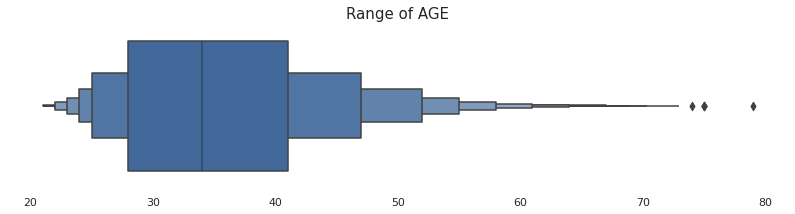

In [20]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['AGE'],color='#3266a8')
plt.grid(False)
plt.xlabel('')
plt.title('Range of AGE',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [24]:
def out_iqr(df , column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
    return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))


In [25]:
out_iqr(df,"AGE")

The IQR is 13.0
The lower bound value is 8.5
The upper bound value is 60.5
Total number of outliers are 272 In percentage 0.9066666666666666


In [26]:
df["AGE"].quantile(0.99)

60.0

In [27]:
df["AGE"] = np.where(df["AGE"] >61, 60,df['AGE'])

**Feature Engineering**

In [30]:
df1=df.copy()
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
df1["PAY_DUE"]=df1["PAY_SEP"]+df1['PAY_AUG']+df1['PAY_JUL']+df1['PAY_JUN']+df1['PAY_MAY']+df1['PAY_APR']

In [34]:
df1[df1["PAY_DUE"]==0]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_Defaulter,PAY_DUE
ID,,,,,,,,,,,,,,,,,,,,,
3,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
4,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
6,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,0
7,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,0
15,250000,1,1,2,29,0,0,0,0,0,...,56875,55512,3000,3000,3000,3000,3000,3000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,130000,1,1,2,34,0,0,0,0,0,...,93708,97353,3000,2000,93000,4000,5027,4005,0,0
29989,250000,1,1,1,34,0,0,0,0,0,...,175005,179687,65000,8800,9011,6000,7000,6009,0,0
29991,140000,1,2,1,41,0,0,0,0,0,...,49675,46121,6000,7000,4228,1505,2000,2000,0,0


In [22]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IS_Defaulter'],
      dtype='object')

In [35]:
df1["BILL_AMT"]=df1['BILL_AMT_SEPT']+df1['BILL_AMT_AUG']+df1['BILL_AMT_JUL']+df1['BILL_AMT_JUN']+df1['BILL_AMT_MAY']+df1['BILL_AMT_APR']
df1["PAY_AMT"]=df1['PAY_AMT_AUG']+df1['PAY_AMT_JUL']+df1['PAY_AMT_JUN']+df1['PAY_AMT_MAY']+df1['PAY_AMT_APR']

In [39]:
df1.drop(['PAY_SEP','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR'],axis=1,inplace=True)

In [40]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,IS_Defaulter,PAY_DUE,BILL_AMT,PAY_AMT
ID,,,,,,,,,
1,20000,2,2,1,24,1,-2,7704,689
2,120000,2,2,2,26,1,3,17077,5000
3,90000,2,2,2,34,0,0,101653,9500
4,50000,2,2,1,37,0,0,231334,6388
5,50000,1,2,1,57,0,-2,109339,57049


In [ ]:
print(df1.PAY_DUE.value_counts())
df1.IS_Defaulter.value_counts()

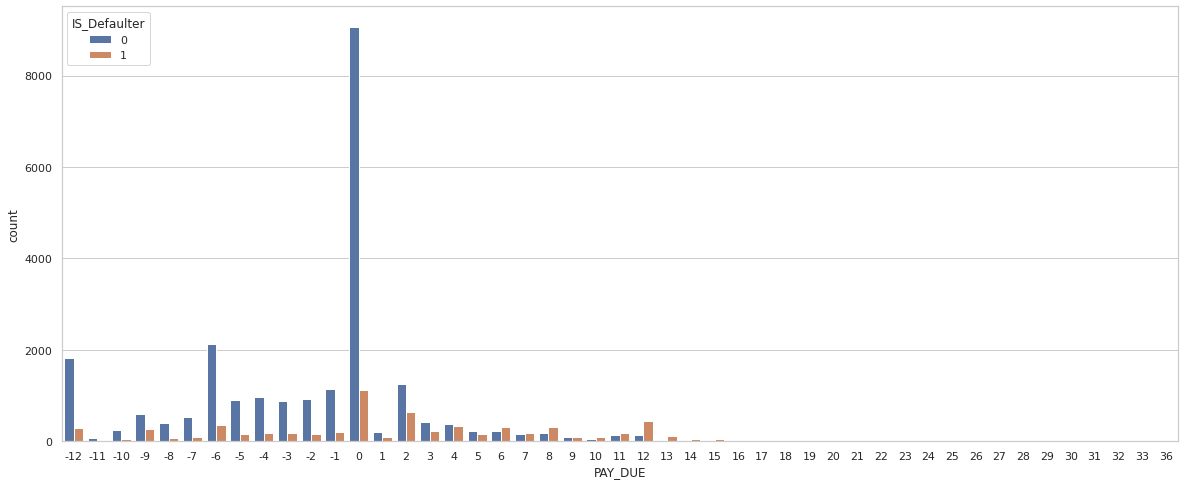

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'PAY_DUE', hue = 'IS_Defaulter', data = df1)

In [50]:
df1.BILL_AMT.value_counts()
df1.BILL_AMT.min()


-336259

In [55]:
df1[(df1.BILL_AMT<0) & (df1.IS_Defaulter==0)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,IS_Defaulter,PAY_DUE,BILL_AMT,PAY_AMT
ID,,,,,,,,,
110,360000,1,2,1,35,0,-9,-618,0
320,180000,1,2,2,29,0,-9,-12,0
352,200000,1,1,1,36,0,-6,-26795,161015
1035,60000,2,2,3,39,0,-9,-7010,4000
1041,20000,1,2,2,26,0,-10,-2570,1400
...,...,...,...,...,...,...,...,...,...
28805,360000,2,1,1,36,0,-9,-6,0
29456,20000,1,2,2,30,0,-9,-7650,4000
29637,160000,1,1,2,35,0,-2,-1044,2234


In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'BILL_AMT', hue = 'IS_Defaulter', data = df1)

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'PAY_AMT', hue = 'IS_Defaulter', data = df1)

#Handling Class Imbalance

SMOTE - Synthetic Minority Oversampling Technique

In [ ]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))